# Cats or Dogs???
## Coded in Keras

## Load Packages

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras import regularizers
import h5py

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Using TensorFlow backend.


## Load datasets

In [2]:
# Check training set groups in a h5 file 
a = h5py.File('datasets/train_catVdog.h5', "r")
list(a)

['list_classes', 'train_set_x', 'train_set_y']

In [3]:
# Check test set groups in a h5 file
b = h5py.File('datasets/test_catVdog.h5', "r")
list(b)

['list_classes', 'test_set_x', 'test_set_y']

In [4]:
# dataset constant
DATAPATH_TRAIN = 'train_catVdog'
DATAPATH_TEST = 'test_catVdog'

In [5]:
# TO LOAD THE .H5 DATASET THAT WAS ALREADY PRE-PROCESSED
def load_dataset():
    train_dataset = h5py.File('datasets/'+ DATAPATH_TRAIN +'.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/'+ DATAPATH_TEST +'.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [7]:
X_train_orig.shape

(14574, 128, 128, 3)

In [8]:
Y_train_orig.shape

(1, 14574)

In [9]:
X_test_orig.shape

(2000, 128, 128, 3)

In [10]:
Y_test_orig.shape

(1, 2000)

## Data processing and check shape

In [ ]:
# Data processing
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [13]:
# check the shape of each dataset
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 14574
number of test examples = 2000
X_train shape: (14574, 128, 128, 3)
Y_train shape: (14574, 1)
X_test shape: (2000, 128, 128, 3)
Y_test shape: (2000, 1)


## Build CNN model in Keras

In [14]:
def model(input_shape):
    
    '''
        Args:
            -- input_shape: shape of the input images 
    '''
    
    # Define the input image
    X_input = Input(input_shape)

    # 1st Convolution
    # CONV0 -> BN0 -> RELU Block -> MAXPOOL0
    X = Conv2D(16, (9, 9), strides = (1, 1), kernel_initializer = 'he_uniform', padding = 'same', name = 'conv0')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool_0')(X)
    
    # 2nd Convolution
    # CONV1 -> BN1 -> RELU Block -> MAXPOOL1
    X = Conv2D(32, (5,5), strides = (1,1), kernel_initializer = 'he_uniform', padding = 'same', name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool_1')(X)
    
    # 3rd Convolution
    # CONV2 -> BN2 -> RELU Block -> MAXPOOL2
    X = Conv2D(64, (3,3), strides = (1,1), kernel_initializer = 'he_uniform', padding = 'same', name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool_2')(X)
    
    # 4th Convolution
    # CONV3 -> BN3 -> RELU Block -> MAXPOOL3
    X = Conv2D(128, (3,3), strides = (1,1), kernel_initializer = 'he_uniform', padding = 'same', name = 'conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool_3')(X)
    
    # Conversion of vector by flattening it + FULLYCONNECTED + L2 Regularization
    # FLATTEN -> FC0 -> FC1(+L2 Regularisation) -> SIGMOID
    X = Flatten()(X)
    X = Dense(64, name='fully_connected_0')(X)
    X = Dense(1, activation='sigmoid', activity_regularizer=regularizers.l2(0.01), name='fully_connected_1')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='CatVSDog9')
 
    return model

## Create the model

In [15]:
maoWoofModel = model(X_train.shape[1:])

In [16]:
# Testing of values
X_train.shape

(14574, 128, 128, 3)

In [17]:
# Testing of values
X_train.shape[1:]

(128, 128, 3)

## Compile the model

In [18]:
maoWoofModel.compile('adam','binary_crossentropy',metrics=['accuracy'])

## Model Summary

In [22]:
maoWoofModel.summary()

Model: "CatVSDog9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 128, 128, 16)      3904      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 128, 128, 16)      64        
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 16)      0         
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 64, 64, 16)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        12832     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 64, 64, 32)        12

## Train the model

In [19]:
EPOCHS = 20

In [20]:
models = maoWoofModel.fit(X_train,Y_train, epochs = EPOCHS, batch_size = 32)

Epoch 1/20
14574/14574 [==============================] - 1061s 73ms/step - loss: 1.2406 - accuracy: 0.5876
Epoch 2/20
14574/14574 [==============================] - 912s 63ms/step - loss: 0.6851 - accuracy: 0.6798
Epoch 3/20
14574/14574 [==============================] - 829s 57ms/step - loss: 0.6227 - accuracy: 0.7270
Epoch 4/20
14574/14574 [==============================] - 964s 66ms/step - loss: 0.5915 - accuracy: 0.7595
Epoch 5/20
14574/14574 [==============================] - 1144s 78ms/step - loss: 0.5641 - accuracy: 0.7741
Epoch 6/20
14574/14574 [==============================] - 1206s 83ms/step - loss: 0.5294 - accuracy: 0.8001
Epoch 7/20
14574/14574 [==============================] - 1086s 75ms/step - loss: 0.5034 - accuracy: 0.8174
Epoch 8/20
14574/14574 [==============================] - 975s 67ms/step - loss: 0.4852 - accuracy: 0.8296
Epoch 9/20
14574/14574 [==============================] - 1077s 74ms/step - loss: 0.4495 - accuracy: 0.8522
Epoch 10/20
14574/14574 [=======

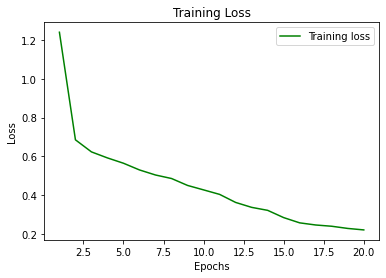

In [21]:
loss_train = models.history['loss']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

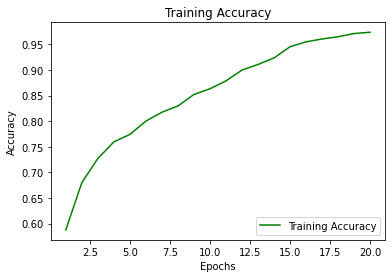

In [51]:
accuracy_train = models.history['accuracy']
epochs = range(1,EPOCHS+1)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.show()

In [23]:
preds = maoWoofModel.evaluate(X_test,Y_test,batch_size=128,verbose=1,sample_weight = None)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2000/2000 [==============================] - 97s 49ms/step

Loss = 1.2094836578369141
Test Accuracy = 0.8314999938011169


## Upload your own photo to play with the model

It's a cat!


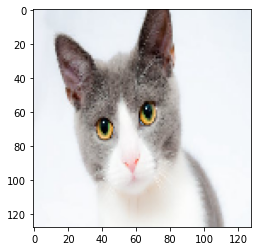

In [71]:
# upload a cat photo example
img_path = 'images/cat1.jpg'

img = image.load_img(img_path, target_size=(128, 128))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 0 is cat 1 is dog
#print(int(maoWoofModel.predict(x)[0][0]))
print("It's a cat!" if int(maoWoofModel.predict(x)[0][0]) == 0 else "It's a dog!")

It's a dog!


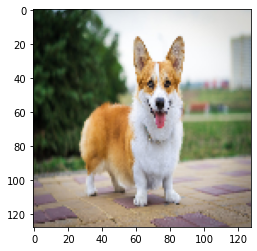

In [72]:
# upload a dog photo example
img_path = 'images/dog1.jpg'

img = image.load_img(img_path, target_size=(128, 128))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 0 is cat 1 is dog
#print(int(maoWoofModel.predict(x)[0][0]))
print("It's a cat!" if int(maoWoofModel.predict(x)[0][0]) == 0 else "It's a dog!")

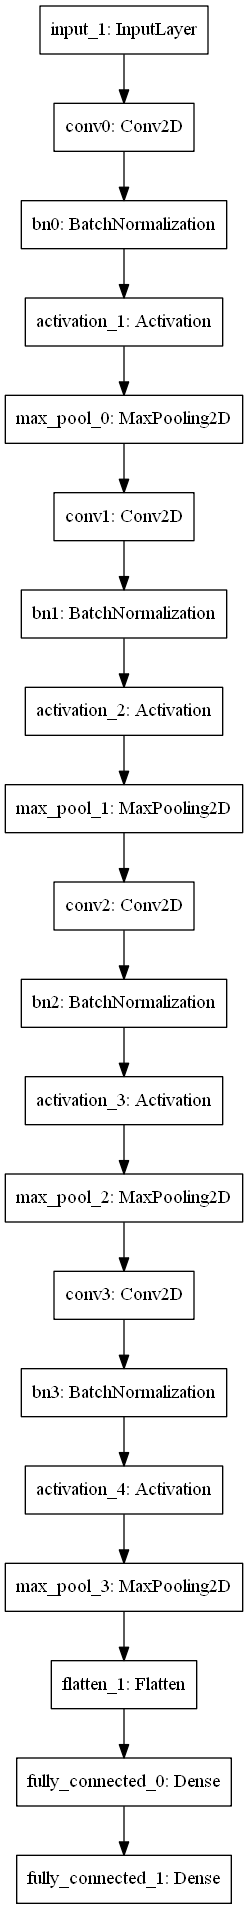

In [73]:
plot_model(maoWoofModel, to_file='catVDogModel.png')
#SVG(model_to_dot(maoWoofModel).create(prog='dot', format='svg'))